## Title: Supervised Machine Learning - Simple Linear Regression
### Author: Brett Neely
#### GitHub Project Link: https://github.com/bncodes19/datafun-07-ml

In [146]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

## Part 1 - Simple Linear Regression - Chart a Straight Line

#### Calculate Celsius and plot Celsius in relation to Farenheit

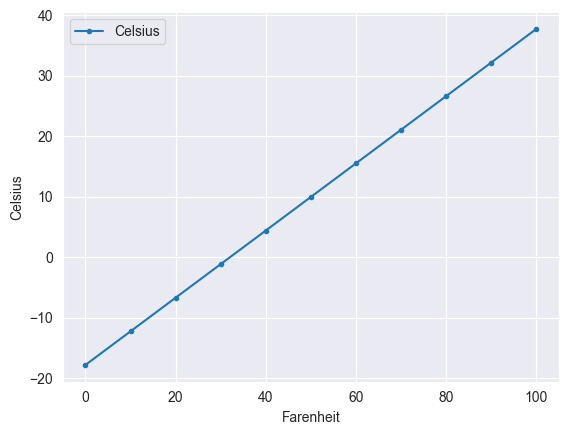

In [147]:
# Calculate Celsius temperature
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Plot Celsius in relation to Farenheit
temps_df = pd.DataFrame(temps, columns=['Farenheit', 'Celsius'])
axes = temps_df.plot(x='Farenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Predict Average High Temperature in NYC in January

### Section 1 - Data Acquisition

In [148]:
# Load the dataset from a csv
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [149]:
# Inspect the Dataframe's head
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [150]:
# Inspect the Dataframe's tail
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [151]:
# Rename 'Value' column to 'Temperature'
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [152]:
# Check the columns datatype
nyc_df.Date.dtype

dtype('int64')

In [153]:
# Divide 'Date' column by 100 to truncate the last two digits
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [154]:
# Describe 'Temperature' column
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [155]:
# Use SciPy to calculate a regression line's slope and intercept for given data data points: Date and Temperature
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

In [156]:
# Calculated slope
linear_regression.slope

0.014771361132966163

In [157]:
# Calculated intercept
linear_regression.intercept

8.694993233674289

In [158]:
# Predict the average Fehrenheit temperature for January 2024
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

In [159]:
# Approximate the average temperature for 1890
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

### Section 7 - Visualization

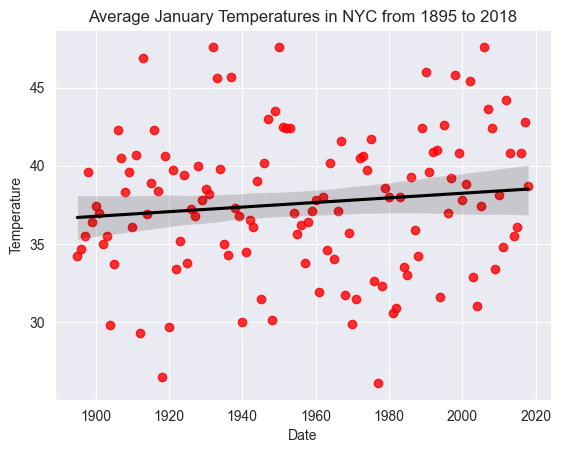

In [160]:
# Plot each datapoint in a regplot
sns.set_style('darkgrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, scatter_kws={"color": "red"}, line_kws={"color": "black"})
plt.title('Average January Temperatures in NYC from 1895 to 2018')
plt.show()

## Part 3 - Predict Average High Temperature in NYC In January

### Section 1 - Build the Model

In [161]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(    
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values,
    random_state=11)

In [162]:
# Check the shape of X_train
X_train.shape

(93, 1)

In [163]:
# Check the shape of X_test
X_test.shape

(31, 1)

In [164]:
# Train the LinearRegression estimator
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [165]:
# Calculated Coef (or slope)
linear_regression.coef_

array([0.01939167])

In [166]:
# Calculated Intercept
linear_regression.intercept_

-0.30779820252658396

### Section 2 - Test the Model

In [167]:
# Test the model with data from X_test and print predictions
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p: .2f}, expected: {e:.2f}')

predicted:  37.86, expected: 31.70
predicted:  38.69, expected: 34.80
predicted:  37.00, expected: 39.40
predicted:  37.25, expected: 45.70
predicted:  38.05, expected: 32.30
predicted:  37.64, expected: 33.80
predicted:  36.94, expected: 39.70


### Section 3 - Predict

In [168]:
# Create prediction lambda
predict = (lambda x: linear_regression.coef_ * x +
                     linear_regression.intercept_)

In [169]:
# Predict average January temperature for 2024
predict(2024)

array([38.94094855])

In [170]:
# Approximate average January temperature for 1890
predict(1890)

array([36.34246432])

### Section 4 - Visualization

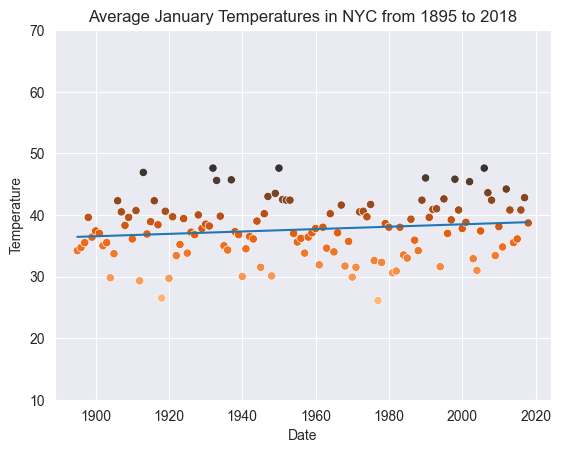

In [171]:
# Plot each data point on a scatter plot
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue = 'Temperature', palette='Oranges_d', legend=False)

axes.set_ylim(10, 70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

y = predict(x)
plt.title('Average January Temperatures in NYC from 1895 to 2018')
line = plt.plot(x, y)

## Part 4 - Conclusion

##### There were two linear regression methods practiced in this notebook: 
- SciPy Library - stats module lineregress function
- Scikit-learn LinearRegression

#### My remarks after completing both:
- The stats module was easier to build and follow
- The regplot visual is a more appealing than the scatter plot visual
- Both methods yielded similar results